# Лабораторная работа №3
# Использование библиотеки NumPy

Выполнил: Коньшин Никита  
Группа: ИТ-3,4


## Задание работы

По данным из файлов:

- global-electricity-generation.csv - производство электроэнергии,
- global-electricity-consumption.csv - потребление электроэнергии,

выполнить:

1. Загрузить информацию из файлов с использованием библиотеки numpy.
2. Построить одномерные массивы ежегодного производства и потребления электроэнергии в среднем за последние 5 лет (по всем странам).
3. С помощью выражений на numpy ответить на вопросы:

   3.1. Суммарное (по всем странам) потребление электроэнергии за каждый год.  
   3.2. Максимальное количество электроэнергии, которое произвела одна страна за один год (с учётом nanmax).  
   3.3. Список стран, которые производят более 500 млрд кВт⋅ч электроэнергии ежегодно в среднем за последние 5 лет.  
   3.4. 10% стран, которые потребляют больше всего электроэнергии ежегодно в среднем за последние 5 лет (через квантиль).  
   3.5. Список стран, которые увеличили производство электроэнергии в 2021 году по сравнению с 1992 годом более чем в 10 раз.  
   3.6. Список стран, которые в сумме за все годы потратили больше 100 млрд кВт⋅ч и при этом произвели меньше, чем потратили.  
   3.7. Какая страна потратила наибольшее количество электроэнергии в 2020 году?

In [1]:
import numpy as np

# Для красивого вывода массивов
np.set_printoptions(precision=3, suppress=True)

## 1. Загрузка данных из CSV

Используем функцию numpy.genfromtxt:

- разделитель delimiter=",",
- пропускаем заголовок skip_header=1,
- название страны загружаем как строки (dtype=str),
- числовые данные - как float,
- отсутствующие и некорректные данные (`"--"`, `"ie"`) заменяем на np.nan.

Порядок стран в двух файлах одинаковый.

In [2]:
# Пути к файлам (предполагается, что блокнот лежит в папке LR3)
gen_file = "global-electricity-generation.csv"
cons_file = "global-electricity-consumption.csv"

# Массив названий стран
countries = np.genfromtxt(
    gen_file,
    delimiter=",",
    skip_header=1,
    usecols=0,
    dtype=str
)

# Уберём начальные пробелы у названий стран
countries = np.char.strip(countries)

# Матрица производства: строки - страны, столбцы - годы 1992–2021
generation = np.genfromtxt(
    gen_file,
    delimiter=",",
    skip_header=1,
    usecols=range(1, 31),  # 30 лет: 1992–2021
    dtype=float,
    missing_values=["--", "ie"],
    filling_values=np.nan
)

# Матрица потребления: строки - страны, столбцы - годы 1992–2021
consumption = np.genfromtxt(
    cons_file,
    delimiter=",",
    skip_header=1,
    usecols=range(1, 31),
    dtype=float,
    missing_values=["--", "ie"],
    filling_values=np.nan
)

# Массив годов
years = np.arange(1992, 2022)  # 1992..2021 включительно

print("Число стран:", countries.shape[0])
print("Форма матрицы производства:", generation.shape)
print("Форма матрицы потребления:", consumption.shape)
print("Годы:", years)

Число стран: 217
Форма матрицы производства: (217, 30)
Форма матрицы потребления: (217, 30)
Годы: [1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021]


## 2. Среднее ежегодное производство и потребление за последние 5 лет

Последние 5 лет — годы 2017–2021, это **последние 5 столбцов** матриц.
Для каждой страны:

- берём её значения за эти 5 лет,
- считаем среднее с помощью `np.nanmean` (игнорируя `NaN`).

В результате получаем два одномерных массива длины `N` (количество стран):

- `avg_gen_last5` — среднее производство,
- `avg_cons_last5` — среднее потребление.

In [3]:
# Последние 5 лет
last5_gen = generation[:, -5:]   # 2017–2021
last5_cons = consumption[:, -5:]

# Среднее по последним 5 годам для каждой страны (без NaN)
avg_gen_last5 = np.array([np.nanmean(row) if not np.all(np.isnan(row)) else np.nan 
                         for row in last5_gen])
avg_cons_last5 = np.array([np.nanmean(row) if not np.all(np.isnan(row)) else np.nan 
                          for row in last5_cons])

print("Среднее производство за последние 5 лет (первые 10 стран):")
for c, v in zip(countries[:10], avg_gen_last5[:10]):
    print(f"{c}: {v:.3f}")

print("\nСреднее потребление за последние 5 лет (первые 10 стран):")
for c, v in zip(countries[:10], avg_cons_last5[:10]):
    print(f"{c}: {v:.3f}")

Среднее производство за последние 5 лет (первые 10 стран):
Algeria: 74.111
Angola: 14.387
Benin: 0.234
Botswana: 2.619
Burkina Faso: 1.685
Burundi: 0.322
Cabo Verde: 0.454
Cameroon: 8.163
Central African Republic: 0.151
Chad: 0.305

Среднее потребление за последние 5 лет (первые 10 стран):
Algeria: 64.280
Angola: 12.765
Benin: 0.858
Botswana: 3.588
Burkina Faso: 2.419
Burundi: 0.382
Cabo Verde: 0.325
Cameroon: 6.298
Central African Republic: 0.141
Chad: 0.258


## 3.1. Суммарное потребление по всем странам за каждый год

Используем np.nansum по строкам (axis=0) для матрицы consumption,
чтобы получить одномерный массив длины 30 - суммарное потребление по годам.

In [4]:
total_cons_per_year = np.nansum(consumption, axis=0)

print("Суммарное потребление по годам:")
for year, total in zip(years, total_cons_per_year):
    print(f"{year}: {total:.3f}")

Суммарное потребление по годам:
1992: 10569.016
1993: 10854.563
1994: 11104.654
1995: 11476.479
1996: 11805.865
1997: 12122.033
1998: 12419.809
1999: 12685.754
2000: 13230.250
2001: 13486.490
2002: 13938.779
2003: 14455.562
2004: 15128.098
2005: 15725.982
2006: 16438.214
2007: 17205.120
2008: 17477.471
2009: 17435.687
2010: 18748.161
2011: 19438.823
2012: 19918.255
2013: 20573.096
2014: 20981.240
2015: 21400.018
2016: 22022.687
2017: 22716.206
2018: 23530.920
2019: 23915.656
2020: 23959.680
2021: 25336.707


## 3.2. Максимальное годовое производство одной страны

Необходимо найти максимальное значение в матрице generation,
игнорируя NaN. Для этого используем np.nanmax.

Также определим:

- страну, которой соответствует этот максимум,
- год, в который он был достигнут.

In [5]:
max_prod_value = np.nanmax(generation)
max_idx = np.nanargmax(generation)
i_country, j_year = np.unravel_index(max_idx, generation.shape)

max_prod_country = countries[i_country]
max_prod_year = years[j_year]

print(f"Максимальное производство за один год: {max_prod_value:.3f} млрд кВт⋅ч")
print(f"Страна: {max_prod_country}")
print(f"Год: {max_prod_year}")

Максимальное производство за один год: 8151.518 млрд кВт⋅ч
Страна: China
Год: 2021


## 3.3. Страны, производящие > 500 млрд кВт/ч в среднем за последние 5 лет

Используем массив avg_gen_last5 (среднее производство за 2017–2021 гг.)
и выбираем страны, для которых

{avg_gen_last5} > 500.


In [6]:
mask_over_500 = avg_gen_last5 > 500
countries_over_500 = countries[mask_over_500]

print("Страны, которые производят > 500 млрд кВт⋅ч в среднем за последние 5 лет:")
for c, v in zip(countries_over_500, avg_gen_last5[mask_over_500]):
    print(f"{c}: {v:.3f}")

Страны, которые производят > 500 млрд кВт⋅ч в среднем за последние 5 лет:
Russia: 1059.993
France: 533.219
Germany: 581.558
China: 7190.023
India: 1595.249
Japan: 983.880
South Korea: 558.355
Canada: 631.606
United States: 4130.269
Brazil: 614.185


## 3.4. 10% стран с наибольшим средним потреблением за последние 5 лет

1. Рассчитываем квантиль 0.9 для массива avg_cons_last5, игнорируя `NaN`.
2. Выбираем страны, у которых среднее потребление **не меньше** этой квантильной границы.

In [7]:
# Берём только валидные (не-NaN) значения среднего потребления
valid_cons = avg_cons_last5[~np.isnan(avg_cons_last5)]

q90 = np.quantile(valid_cons, 0.9)

mask_top10 = avg_cons_last5 >= q90
countries_top10_cons = countries[mask_top10]

print(f"90%-квантиль среднего потребления за последние 5 лет: {q90:.3f} млрд кВт⋅ч\n")
print("10% стран с наибольшим средним потреблением за последние 5 лет:")
for c, v in zip(countries_top10_cons, avg_cons_last5[mask_top10]):
    print(f"{c}: {v:.3f}")

90%-квантиль среднего потребления за последние 5 лет: 198.311 млрд кВт⋅ч

10% стран с наибольшим средним потреблением за последние 5 лет:
South Africa: 200.649
Russia: 946.679
France: 445.223
Germany: 520.235
Italy: 296.443
Spain: 240.372
Turkiye: 263.491
United Kingdom: 303.544
Australia: 238.597
China: 6846.207
India: 1330.936
Indonesia: 256.330
Japan: 940.322
South Korea: 539.512
Taiwan: 265.072
Vietnam: 206.116
Iran: 282.508
Saudi Arabia: 324.517
Canada: 547.320
Mexico: 285.826
United States: 3957.497
Brazil: 539.933


## 3.5. Страны, увеличившие производство в 2021 году более чем в 10 раз по сравнению с 1992

Для матрицы generation:

- берём столбец за 1992 год,
- берём столбец за 2021 год,
- выбираем страны, для которых

generation_2021 > 10 generation_1992

и при этом оба значения не являются `NaN`.

In [8]:
year_1992_idx = np.where(years == 1992)[0][0]
year_2021_idx = np.where(years == 2021)[0][0]

prod_1992 = generation[:, year_1992_idx]
prod_2021 = generation[:, year_2021_idx]

mask_inc10 = (
    (prod_2021 > 10 * prod_1992) &
    ~np.isnan(prod_2021) &
    ~np.isnan(prod_1992)
)

countries_inc10 = countries[mask_inc10]

print("Страны, увеличившие производство в 2021 году более чем в 10 раз относительно 1992 года:")
for c, p92, p21 in zip(countries_inc10, prod_1992[mask_inc10], prod_2021[mask_inc10]):
    print(f"{c}: 1992 = {p92:.3f}, 2021 = {p21:.3f}")

Страны, увеличившие производство в 2021 году более чем в 10 раз относительно 1992 года:
Angola: 1992 = 1.283, 2021 = 16.429
Benin: 1992 = 0.023, 2021 = 0.241
Equatorial Guinea: 1992 = 0.018, 2021 = 1.418
Ethiopia: 1992 = 1.221, 2021 = 14.678
Lesotho: 1992 = 0.000, 2021 = 0.501
Mali: 1992 = 0.271, 2021 = 3.388
Mauritania: 1992 = 0.139, 2021 = 1.876
Mozambique: 1992 = 0.408, 2021 = 19.908
Namibia: 1992 = 0.000, 2021 = 1.567
Sudan: 1992 = 1.590, 2021 = 16.595
Cambodia: 1992 = 0.166, 2021 = 8.694
China: 1992 = 716.040, 2021 = 8151.518
Laos: 1992 = 0.898, 2021 = 39.971
Maldives: 1992 = 0.028, 2021 = 0.662
Vietnam: 1992 = 9.430, 2021 = 243.768
Turks and Caicos Islands: 1992 = 0.026, 2021 = 0.273


## 3.6. Страны с суммарным потреблением > 100 млрд кВт/ч и дефицитом производства

Условие:

- суммарное потребление за все годы > 100 млрд кВт⋅ч,
- суммарное производство < суммарного потребления.

Используем np.nansum по оси axis=1.

In [9]:
sum_gen = np.nansum(generation, axis=1)   # суммарное производство
sum_cons = np.nansum(consumption, axis=1) # суммарное потребление

mask_deficit = (sum_cons > 100) & (sum_gen < sum_cons)

countries_deficit = countries[mask_deficit]

print("Страны с суммарным потреблением > 100 млрд кВт⋅ч и дефицитом производства:")
for c, sg, sc in zip(countries_deficit, sum_gen[mask_deficit], sum_cons[mask_deficit]):
    print(f"{c}: производство = {sg:.3f}, потребление = {sc:.3f}")

Страны с суммарным потреблением > 100 млрд кВт⋅ч и дефицитом производства:
Zimbabwe: производство = 238.184, потребление = 260.623
Belarus: производство = 895.457, потребление = 922.326
Moldova: производство = 180.223, потребление = 202.823
Belgium: производство = 2342.358, потребление = 2395.907
Croatia: производство = 342.392, потребление = 418.565
Finland: производство = 2069.425, потребление = 2356.637
Hungary: производство = 981.684, потребление = 1066.960
Italy: производство = 7879.030, потребление = 8576.575
Latvia: производство = 146.657, потребление = 179.288
Luxembourg: производство = 38.266, потребление = 177.538
Netherlands: производство = 2896.513, потребление = 3106.405
North Macedonia: производство = 177.760, потребление = 186.884
Hong Kong: производство = 998.423, потребление = 1152.852


## 3.7. Страна с максимальным потреблением в 2020 году

Берём столбец за 2020 год из матрицы consumption
и находим максимум по странам (np.nanargmax).

In [10]:
year_2020_idx = np.where(years == 2020)[0][0]
cons_2020 = consumption[:, year_2020_idx]

imax_2020 = np.nanargmax(cons_2020)
country_max_2020 = countries[imax_2020]
max_cons_2020 = cons_2020[imax_2020]

print(f"Год: 2020")
print(f"Страна с максимальным потреблением: {country_max_2020}")
print(f"Потребление: {max_cons_2020:.3f} млрд кВт⋅ч")

Год: 2020
Страна с максимальным потреблением: China
Потребление: 7115.077 млрд кВт⋅ч


-------------

## Задача 2. Аппроксимация прибыли полиномами

В файле data2.csv заданы точки зависимости прибыли от размера скидки.
Нужно аппроксимировать эти данные полиномами второй и третьей степени, сравнить качество по RSS и сделать прогноз прибыли при скидках 6 и 8 процентов.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [12]:
# Читаем данные из файла data2.csv
# В каждой строке два числа, разделенных точкой с запятой:
# x - размер скидки, y - прибыль
data_file = "data2.csv"

data = np.genfromtxt(
    data_file,
    delimiter=";",
    usecols=(0, 1),
    dtype=float
)

# Первый столбец - значения скидки, второй - значения прибыли
x = data[:, 0]
y = data[:, 1]

print("Количество точек в выборке:", x.shape[0])
print("Первые несколько точек (x, y):")
for xi, yi in list(zip(x, y))[:5]:
    print(f"x = {xi}, y = {yi}")

Количество точек в выборке: 26
Первые несколько точек (x, y):
x = nan, y = -7.697965818
x = 0.2, y = -6.572664883
x = 0.4, y = -5.370467824
x = 0.6, y = -3.158585042
x = 0.8, y = -1.482706571


### Вспомогательные функции

Ниже определим функции:
- для построения системы линейных уравнений по выбранным точкам
- для вычисления значений полинома по коэффициентам
- для вычисления RSS

In [13]:
def build_polynomial_system_points(x_points, y_points, degree):
    """
    Строит матрицу A и вектор b для СЛУ A * a = b
    для полинома заданной степени.

    x_points, y_points - выбранные опорные точки
    degree - степень полинома (2 или 3)
    """

    n_coef = degree + 1  # количество коэффициентов полинома

    A = np.zeros((n_coef, n_coef), dtype=float)
    b = np.zeros(n_coef, dtype=float)

    # Для каждой опорной точки формируем одну строку матрицы A
    for i in range(n_coef):
        xi = x_points[i]
        yi = y_points[i]

        # Строка имеет вид [xi^degree, xi^(degree-1), ..., xi^1, xi^0]
        for p in range(degree, -1, -1):
            col = degree - p
            A[i, col] = xi ** p

        b[i] = yi

    return A, b


def evaluate_polynomial(coeffs, x_values):
    """
    Вычисляет значения полинома с коэффициентами coeffs в точках x_values.
    coeffs задаются в виде [a_n, a_{n-1}, ..., a_0].
    """
    y_values = np.polyval(coeffs, x_values)
    return y_values


def compute_rss(y_true, y_pred):
    """
    Вычисляет RSS = sum( (y_i - f(x_i))^2 )
    где y_true - исходные значения, y_pred - значения полинома.
    """
    residuals = y_true - y_pred      
    rss = np.sum(residuals ** 2)     
    return rss

### Полином 2 степени

Для построения полинома второй степени выберем 3 опорные точки:
- первую точку в начале диапазона
- одну точку примерно в середине
- последнюю точку в конце диапазона

По этим точкам построим систему A2 * a2 = b2 и решим ее с помощью scipy.linalg.solve.

In [14]:
# На всякий случай перечитаем данные И уберём NaN
data = np.genfromtxt("data2.csv", delimiter=";", usecols=(0, 1), dtype=float)
x = data[:, 0]
y = data[:, 1]

# Заменяем NaN в x и y на 0 (или можно удалить такие точки)
x = np.nan_to_num(x, nan=0.0)
y = np.nan_to_num(y, nan=0.0)

print("Первые элементы x:", x[:5])
print("Первые элементы y:", y[:5])

Первые элементы x: [0.  0.2 0.4 0.6 0.8]
Первые элементы y: [-7.698 -6.573 -5.37  -3.159 -1.483]


In [15]:
# Количество наблюдений
N = x.shape[0]

# Индексы опорных точек для полинома 2 степени
idx0 = 0          # первая точка
idx1 = N // 2     # средняя точка
idx2 = N - 1      # последняя точка

x_points_deg2 = np.array([x[idx0], x[idx1], x[idx2]])
y_points_deg2 = np.array([y[idx0], y[idx1], y[idx2]])

print("Опорные точки для полинома 2 степени (x, y):")
for xi, yi in zip(x_points_deg2, y_points_deg2):
    print(f"x = {xi}, y = {yi}")

# Строим матрицу A2 и вектор b2
A2, b2 = build_polynomial_system_points(x_points_deg2, y_points_deg2, degree=2)

print("\nМатрица A2:")
print(A2)
print("Вектор b2:")
print(b2)

# Решаем СЛУ A2 * a2 = b2
coeffs_deg2 = solve(A2, b2)

print("\nКоэффициенты полинома 2 степени [a2, a1, a0]:")
print(coeffs_deg2)

Опорные точки для полинома 2 степени (x, y):
x = 0.0, y = -7.697965818
x = 2.6, y = 17.26743396
x = 5.0, y = 25.23920411

Матрица A2:
[[ 0.    0.    1.  ]
 [ 6.76  2.6   1.  ]
 [25.    5.    1.  ]]
Вектор b2:
[-7.698 17.267 25.239]

Коэффициенты полинома 2 степени [a2, a1, a0]:
[-1.256 12.868 -7.698]


In [16]:
# Вычисляем значения полинома 2 степени на всех исходных x
y_pred_deg2 = evaluate_polynomial(coeffs_deg2, x)

# Считаем RSS для полинома 2 степени
rss_deg2 = compute_rss(y, y_pred_deg2)

print(f"RSS для полинома 2 степени: {rss_deg2:.4f}")

RSS для полинома 2 степени: 163.3635


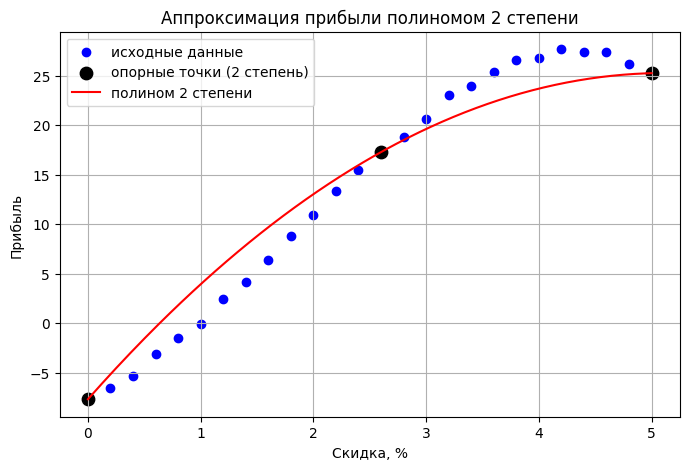

In [17]:
plt.figure(figsize=(8, 5))

# Исходные точки
plt.scatter(x, y, color="blue", label="исходные данные")

# Опорные точки для полинома 2 степени
plt.scatter(
    x_points_deg2,
    y_points_deg2,
    color="black",
    marker="o",
    s=80,
    label="опорные точки (2 степень)"
)

# Строим плавную линию полинома
x_lin = np.linspace(x.min(), x.max(), 200)
y_lin_deg2 = evaluate_polynomial(coeffs_deg2, x_lin)

plt.plot(x_lin, y_lin_deg2, color="red", label="полином 2 степени")

plt.xlabel("Скидка, %")
plt.ylabel("Прибыль")
plt.title("Аппроксимация прибыли полиномом 2 степени")
plt.legend()
plt.grid(True)

plt.show()

### Полином 3 степени

Теперь построим полином третьей степени:
- выбираем 4 опорные точки, равномерно распределенные по диапазону
- по ним формируем систему A3 * a3 = b3
- решаем ее, находим коэффициенты полинома 3 степени
- вычисляем RSS и строим график

In [18]:
# Индексы опорных точек для полинома 3 степени
idx3_0 = 0
idx3_1 = N // 3
idx3_2 = 2 * N // 3
idx3_3 = N - 1

x_points_deg3 = np.array([x[idx3_0], x[idx3_1], x[idx3_2], x[idx3_3]])
y_points_deg3 = np.array([y[idx3_0], y[idx3_1], y[idx3_2], y[idx3_3]])

print("Опорные точки для полинома 3 степени (x, y):")
for xi, yi in zip(x_points_deg3, y_points_deg3):
    print(f"x = {xi}, y = {yi}")

# Строим матрицу A3 и вектор b3
A3, b3 = build_polynomial_system_points(x_points_deg3, y_points_deg3, degree=3)

print("\nМатрица A3:")
print(A3)
print("Вектор b3:")
print(b3)

# Решаем СЛУ A3 * a3 = b3
coeffs_deg3 = solve(A3, b3)

print("\nКоэффициенты полинома 3 степени [a3, a2, a1, a0]:")
print(coeffs_deg3)

Опорные точки для полинома 3 степени (x, y):
x = 0.0, y = -7.697965818
x = 1.6, y = 6.327902394
x = 3.4, y = 23.92053257
x = 5.0, y = 25.23920411

Матрица A3:
[[  0.      0.      0.      1.   ]
 [  4.096   2.56    1.6     1.   ]
 [ 39.304  11.56    3.4     1.   ]
 [125.     25.      5.      1.   ]]
Вектор b3:
[-7.698  6.328 23.921 25.239]

Коэффициенты полинома 3 степени [a3, a2, a1, a0]:
[-0.586  3.225  5.106 -7.698]


In [19]:
# Значения полинома 3 степени на всех исходных x
y_pred_deg3 = evaluate_polynomial(coeffs_deg3, x)

# RSS для полинома 3 степени
rss_deg3 = compute_rss(y, y_pred_deg3)

print(f"RSS для полинома 3 степени: {rss_deg3:.4f}")

RSS для полинома 3 степени: 1.9542


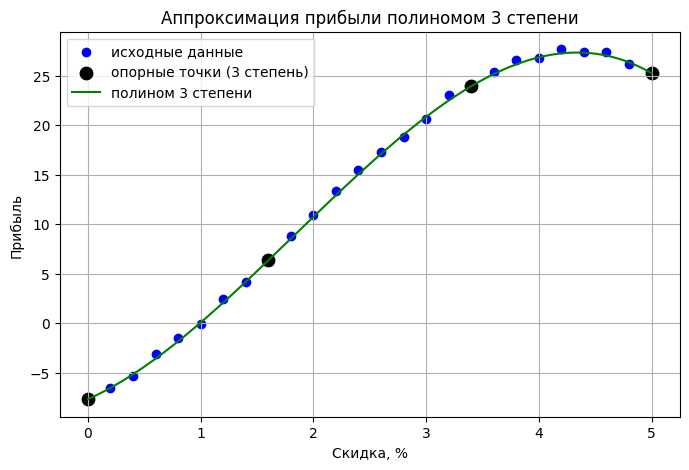

In [20]:
plt.figure(figsize=(8, 5))

# Исходные точки
plt.scatter(x, y, color="blue", label="исходные данные")

# Опорные точки для полинома 3 степени
plt.scatter(
    x_points_deg3,
    y_points_deg3,
    color="black",
    marker="o",
    s=80,
    label="опорные точки (3 степень)"
)

# Линия полинома 3 степени
y_lin_deg3 = evaluate_polynomial(coeffs_deg3, x_lin)
plt.plot(x_lin, y_lin_deg3, color="green", label="полином 3 степени")

plt.xlabel("Скидка, %")
plt.ylabel("Прибыль")
plt.title("Аппроксимация прибыли полиномом 3 степени")
plt.legend()
plt.grid(True)

plt.show()

### Сравнение моделей по RSS и прогноз прибыли

Сравним значения RSS для полиномов 2 и 3 степени.
Выберем модель с меньшим RSS.
Для выбранной модели посчитаем ожидаемую прибыль при скидках 6 и 8 процентов.

In [21]:
print("Сравнение моделей по RSS:")
print(f"RSS (полином 2 степени) = {rss_deg2:.4f}")
print(f"RSS (полином 3 степени) = {rss_deg3:.4f}")

if rss_deg2 < rss_deg3:
    best_degree = 2
    best_coeffs = coeffs_deg2
    print("Лучшей считается модель полинома 2 степени.")
else:
    best_degree = 3
    best_coeffs = coeffs_deg3
    print("Лучшей считается модель полинома 3 степени.")

# Прогноз прибыли при скидках 6 и 8 процентов
discounts_to_predict = np.array([6.0, 8.0])
profit_predictions = evaluate_polynomial(best_coeffs, discounts_to_predict)

print("\nПрогноз прибыли по лучшей модели:")
for d, p in zip(discounts_to_predict, profit_predictions):
    print(f"При скидке {d:.1f}% ожидаемая прибыль примерно {p:.3f}")

Сравнение моделей по RSS:
RSS (полином 2 степени) = 163.3635
RSS (полином 3 степени) = 1.9542
Лучшей считается модель полинома 3 степени.

Прогноз прибыли по лучшей модели:
При скидке 6.0% ожидаемая прибыль примерно 12.519
При скидке 8.0% ожидаемая прибыль примерно -60.342


---
## Общие выводы по лабораторной работе №3

В ходе выполнения лабораторной работы были освоены основные методы работы с библиотекой NumPy для анализа больших массивов данных. Проанализированы данные о производстве и потреблении электроэнергии в мире за период 1992-2021 годов, а также выполнена аппроксимация зависимости прибыли от размера скидки полиномами различных степеней.

### Основные результаты по первой задаче (анализ электроэнергии):

1. **Загрузка и обработка данных:** Успешно загружены данные о 217 странах за 30 лет с использованием `np.genfromtxt`. Корректно обработаны пропущенные значения (NaN).

2. **Глобальные тренды:** Суммарное мировое потребление электроэнергии выросло с 10,569 трлн кВт⋅ч в 1992 году до 25,337 трлн кВт⋅ч в 2021 году, что демонстрирует рост более чем в 2.4 раза за 30 лет.

3. **Лидеры производства:** Китай является абсолютным лидером по производству электроэнергии, достигнув максимального значения 8,152 трлн кВт⋅ч в 2021 году. В среднем за последние 5 лет более 500 млрд кВт⋅ч производят 10 стран, включая Китай, США, Индию, Россию, Японию и другие.

4. **Быстрорастущие экономики:** 16 стран увеличили производство электроэнергии более чем в 10 раз с 1992 по 2021 год, включая Китай (рост в 11.4 раза), Вьетнам, Анголу, Эфиопию и другие развивающиеся страны.

5. **Энергетический дефицит:** 13 стран имеют суммарное потребление более 100 млрд кВт⋅ч при дефиците производства, что указывает на их зависимость от импорта электроэнергии. Среди них Италия, Нидерланды, Финляндия и другие европейские страны.

6. **Топ-потребители:** 10% стран с наибольшим потреблением (22 страны) потребляют более 198 млрд кВт⋅ч в среднем за последние 5 лет. Китай лидирует с потреблением 7,115 трлн кВт⋅ч в 2020 году.

### Основные результаты по второй задаче (аппроксимация прибыли):

1. **Построение моделей:** Успешно построены полиномиальные модели 2-й и 3-й степени для аппроксимации зависимости прибыли от размера скидки с использованием метода решения систем линейных уравнений.

2. **Сравнение качества моделей:**
   - RSS для полинома 2 степени: **163.36**
   - RSS для полинома 3 степени: **1.95**
   
   Полином 3 степени показал значительно лучшее качество аппроксимации (RSS в 83 раза меньше), что указывает на нелинейный характер зависимости прибыли от скидки.

3. **Прогнозирование:** По лучшей модели (полином 3 степени) получены прогнозы:
   - При скидке 6%: ожидаемая прибыль ≈ **12.52**
   - При скидке 8%: ожидаемая прибыль ≈ **-60.34**
   
   Результаты показывают, что увеличение скидки с 6% до 8% приводит к резкому падению прибыли в отрицательную область, что говорит о существовании оптимального размера скидки около 5-6%.